In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
col_pal =  plt.rcParams["axes.prop_cycle"].by_key()["color"]
import plotly.express as px
plt.style.use ("fivethirtyeight")
from fredapi import Fred
import env
pd.set_option("max_columns",500)
import json

In [2]:
fred_key = "485ce230afb4cff30f7dcbff4862099c"
# from kaggle_secrets import UserSecretsClients
# secrets = UserSecretsClients()
# fred_key = secrets.getsecret("fred-api")

In [3]:
fred=Fred(api_key = fred_key)

In [4]:
fred

In [5]:
# fred.search("S&P", order_by = "popularity")
fred.search("S&P").head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2022-11-07,2022-11-07,S&P 500,2012-11-05,2022-11-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-04 19:10:49-05:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2022-11-07,2022-11-07,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2022-11-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-07 08:36:09-06:00,53,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2022-11-07,2022-11-07,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,36,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2022-11-07,2022-11-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,91,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2022-11-07,2022-11-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-10-25 08:02:03-05:00,80,"For more information regarding the index, plea..."


# Pull Raw Data 


In [6]:
sp500 = fred.get_series(series_id = "SP500")

<AxesSubplot:title={'center':'S&P 500'}>

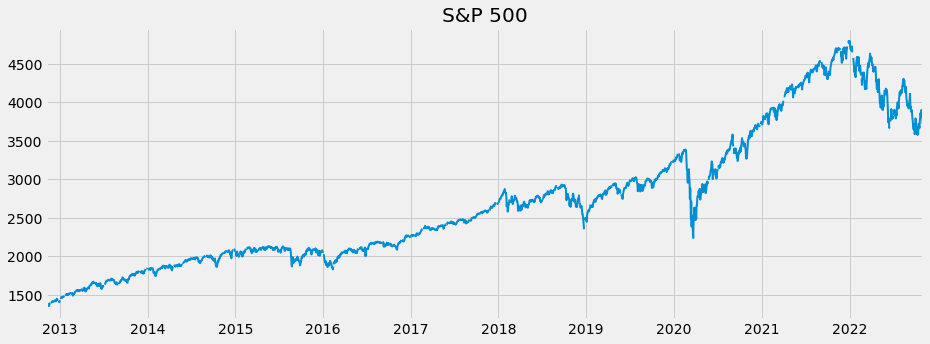

In [7]:
sp500.plot(figsize= (14,5), title = "S&P 500", lw = 2)

# 4. Pull multiple data series

In [8]:
unemp_results = fred.search("unemployment")

In [9]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-11-07,2022-11-07,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:03-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-11-07,2022-11-07,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-04 07:43:03-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2022-11-07,2022-11-07,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,71,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-11-07,2022-11-07,Unemployment Level,1948-01-01,2022-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-11-04 07:44:06-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2022-11-07,2022-11-07,Continued Claims (Insured Unemployment),1967-01-07,2022-10-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-11-03 07:33:03-05:00,70,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN530630000000003A,LAUCN530630000000003A,2022-11-07,2022-11-07,"Unemployment Rate in Spokane County, WA",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:50:43-05:00,1,These data come from the Current Population Su...
LAUCN060250000000003A,LAUCN060250000000003A,2022-11-07,2022-11-07,"Unemployment Rate in Imperial County, CA",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:57:58-05:00,1,These data come from the Current Population Su...
LAUCN484530000000003A,LAUCN484530000000003A,2022-11-07,2022-11-07,"Unemployment Rate in Travis County, TX",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:14:46-05:00,1,These data come from the Current Population Su...


In [10]:
#PULL FROM ID IN UNEMP RESULTS
unemp_rate = fred.get_series("UNRATE")

In [11]:
unemp_rate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<AxesSubplot:>

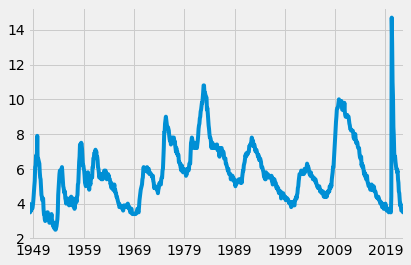

In [12]:
unemp_rate.plot()

In [13]:
unemp_df = fred.search("unemployment rate state", filter = ("frequency", "Monthly" ))
# running a query to find specific data that I am looking for
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]

In [14]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'LNS14000031', 'CAUR', 'M0892AUSM156SNBR',
       'M0892BUSM156SNBR', 'LNS14000024', 'TXUR', 'LNS14000002', 'NYUR',
       'U2RATE', 'FLUR', 'LNS14027662', 'LNS14000009', 'LNS14000003',
       'LNS14000001', 'LNS14027660', 'ALUR', 'OHUR', 'MIUR', 'KYUR',
       'LRUN64TTUSM156S', 'PAUR', 'MNUR', 'ILUR', 'AKUR', 'WVUR', 'INUR',
       'LNS14032183', 'NCUR', 'MAUR', 'COUR', 'MOUR', 'NJUR', 'GAUR', 'NDUR',
       'LNS14000012', 'LNS14027659', 'LASMT261982000000003', 'WIUR', 'AZUR',
       'WAUR', 'HIUR', 'TNUR', 'OKUR', 'IAUR', 'UTUR', 'NMUR', 'LAUR', 'ARUR',
       'VAUR', 'ORUR', 'SCUR', 'NVUR', 'KSUR', 'LASMT391746000000003', 'MEUR',
       'LNS14000060', 'LNS14000032', 'LNS14000018', 'SDUR', 'MTUR', 'MDUR',
       'LNS14024887', 'WYUR', 'IDUR', 'PRUR', 'MSUR', 'CTUR', 'NEUR',
       'LNS14027689', 'DCUR', 'LNS14000036', 'VTUR', 'RIUR', 'NHUR',
       'LNS14000028', 'DEUR', 'LRHUTTTTUSM156S', 'CMWRUR', 'CNERUR',
       'LNS14000026', 'LNS14000029', 'LRUN

In [15]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
uemp_result = pd.concat(all_results, axis = 1)

In [18]:
uemp_result.isna().mean()
pd.set_option('display.max_rows', 80)


In [19]:
uemp_result.isna().mean()


UNRATE              0.191719
LNS14000006         0.450945
LNS14000031         0.450945
CAUR                0.495050
M0892AUSM156SNBR    0.856886
                      ...   
LNS14000150         0.267327
LNS14000062         0.191719
LNS14100000         0.407741
LNS14000061         0.191719
LRUN55TTUSM156S     0.431143
Length: 100, dtype: float64

In [20]:
uemp_result.columns

Index(['UNRATE', 'LNS14000006', 'LNS14000031', 'CAUR', 'M0892AUSM156SNBR',
       'M0892BUSM156SNBR', 'LNS14000024', 'TXUR', 'LNS14000002', 'NYUR',
       'U2RATE', 'FLUR', 'LNS14027662', 'LNS14000009', 'LNS14000003',
       'LNS14000001', 'LNS14027660', 'ALUR', 'OHUR', 'MIUR', 'KYUR',
       'LRUN64TTUSM156S', 'PAUR', 'MNUR', 'ILUR', 'AKUR', 'WVUR', 'INUR',
       'LNS14032183', 'NCUR', 'MAUR', 'COUR', 'MOUR', 'NJUR', 'GAUR', 'NDUR',
       'LNS14000012', 'LNS14027659', 'LASMT261982000000003', 'WIUR', 'AZUR',
       'WAUR', 'HIUR', 'TNUR', 'OKUR', 'IAUR', 'UTUR', 'NMUR', 'LAUR', 'ARUR',
       'VAUR', 'ORUR', 'SCUR', 'NVUR', 'KSUR', 'LASMT391746000000003', 'MEUR',
       'LNS14000060', 'LNS14000032', 'LNS14000018', 'SDUR', 'MTUR', 'MDUR',
       'LNS14024887', 'WYUR', 'IDUR', 'PRUR', 'MSUR', 'CTUR', 'NEUR',
       'LNS14027689', 'DCUR', 'LNS14000036', 'VTUR', 'RIUR', 'NHUR',
       'LNS14000028', 'DEUR', 'LRHUTTTTUSM156S', 'CMWRUR', 'CNERUR',
       'LNS14000026', 'LNS14000029', 'LRUN

In [28]:
unemployment_rate = uemp_result[['UNRATE']]

In [30]:
unemployment_rate.head()

,UNRATE
1929-04-01,NaN
1929-05-01,NaN
1929-06-01,NaN
1929-07-01,NaN
1929-08-01,NaN
